# Python for Data Science

Machine Learning 3 - Scikit Learn API, ML Pipelines, Cross-Validation

In [1]:
!pip install -r requirements.txt

# Overview

- Combinations of heterogeneous features

- Model Evaluation

- Scikit Learn API: Estimators, Pipelines

- Application Example: A Text Classification Pipeline

- Hyperparameter Optimization

# Feature Extraction
   
- Continuous Features:
 * Normalization:
     * Standardization (z-scoring)
     * MinMaxScaling
- Categorical Features
 * One-Hot-Encoding
- Text:
 * Bag-of-N-Gram Features
- Images
 * Classical Computer Vision (HOG features)
 * Activations of higher layers of Convolutional Neural Network
  

# Machine Learning Pipelines

![ml-pipeline-2.png](figures/ml-pipeline.png)

# Scikit Learn API

[Scikit Learn](https://scikit-learn.org) is a popular machine learning library. 


Its API was copied in many other libraries (e.g. spark.ml). 


It offers most feature transformations, ML models, metrics and many useful tools. 

Two types of objects:

* [Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html)
 * **Do not learn from data** (do not have data dependent state)

* [Estimators](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html)
 * **Learn from data** (have data dependent state)
 * Do not work until you called `fit` on them
 * Once fitted, Estimators become Transformers


## Estimators

- implement ``set_params()`` and ``get_params()``
- implement ``fit`` method
- Examples for what ``fit`` does: 
    - [sklearn.feature_extraction.text.CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html): learns dictionary
    - [sklearn.linear_model.Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html): learns weight vector
    and Pipelines

- implement ``transform`` method
- Examples for what ``transform`` does: 
    - [sklearn.feature_extraction.text.CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html): extracts n-gram counts
    - [sklearn.linear_model.Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html): projects data onto weight vector

## Pipelines

Estimators with standardized API can be chained in a Pipeline. 

This allows to chain all feature extraction and classification into one object

Pipelines behave like Estimators themselves, with ``fit`` and ``transform`` methods

All parameters of a Pipeline can be optimized jointly

### A Toy Data Example Pipelines for Text Classification


In [2]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import Perceptron

reviews = [ 
        "This is a horrible movie", 
        "a great movie",
        "a fantastic movie",
    ]
sentiment = [-1, 1, 1]

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('clf', Perceptron())])

text_clf.fit(reviews, sentiment)

text_clf.predict(reviews)

array([-1,  1,  1])

# Pipelines With Heterogeneous Features

- For best maintainability and clarity ML Pipelines contain **all feature preprocessing steps**

- The ColumnTransformer extracts features from pandas DataFrames into sklearn pipelines

- This allows to optimize **all hyperparameters** end-to-end

- We look at an example from the [sklearn documentation](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html)

In [3]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(0)

# Load data from https://www.openml.org/d/40945
X_df, y_series = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
y_series.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: category
Categories (2, object): ['0', '1']

### Numeric Features

* age: float.
* fare: float.

In [5]:
# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

### Categoric Features

* embarked: categories encoded as strings {'C', 'S', 'Q'}.
* sex: categories encoded as strings {'female', 'male'}.
* pclass: ordinal integers {1, 2, 3}.

In [6]:
categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

### Constructing the Pipeline

* ColumnTransformer extracts features and concatenates them

In [7]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

### Training the Pipeline

* ColumnTransformer extracts features and concatenates them

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_series, test_size=0.2)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.790


# Model Evaluation
    
- Machine Learning models are evaluated by comparing the predictions $f(x)=\hat{y}$ and the target values $y$

- As ML models can memorize any training data set, **all metrics must always be computed using cross-validation**

## Classification Metrics

- Accuracy
- Precision
- Recall
- F1

## Accuracy

Defined as 

$\frac{\text{number of correct assignments}}{\text{number of data points}}$

Problem: Imbalanced classes

In [9]:
from sklearn.metrics import accuracy_score
y_true = [1,0,1,1]
y_predicted = [1,1,1,1]
accuracy_score(y_true,y_predicted)

0.75

## Precision

$${\text{precision}}={\frac {|\{{\text{relevant instances}}\}\cap \{{\text{predicted instances}}\}|}{|\{{\text{predicted instances}}\}|}}$$


In [10]:
from sklearn.metrics import precision_score
y_true = [1,0,1,1]
y_predicted = [1,1,0,0]
precision_score(y_true,y_predicted)

0.5

### Precision for Multiclass Problems

* Precision is only defined for **binary classification**

* For multiclass problems, the binary precision scores need to be averaged:
 * *micro* average: Count TP and FN across all classes, then compute precision
 * *macro* average: Compute precision for each class, then average
 * *class-frequency weighted* average: Compute precision weight single class precision by the class frequency, them average them

In [11]:
y_true = [1,0,1,2,3]
y_predicted = [1,1,1,0,1]
print(f"Micro-Average: {precision_score(y_true,y_predicted, average='micro', zero_division=0)}")
print(f"Macro-Average: {precision_score(y_true,y_predicted, average='macro', zero_division=0)}")
print(f"Class-frequency weighted: {precision_score(y_true,y_predicted,average='weighted', zero_division=0)}")

Micro-Average: 0.4
Macro-Average: 0.125
Class-frequency weighted: 0.2


## Recall


$${\text{recall}}={\frac {|\{{\text{relevant instances}}\}\cap \{{\text{predicted instances}}\}|}{|\{{\text{relevant instances}}\}|}}$$


In [12]:
from sklearn.metrics import recall_score
y_true = [1,0,1,1]
y_predicted = [1,1,0,0]
recall_score(y_true,y_predicted)

0.3333333333333333

## F1 Score

$$F=2\cdot {\frac {\mathrm {precision} \cdot \mathrm {recall} }{\mathrm {precision} +\mathrm {recall} }}$$

In [13]:
from sklearn.metrics import f1_score
y_true = [1,0,1,1]
y_predicted = [1,1,0,0]
f1_score(y_true,y_predicted)

0.4

## Precision and Recall
<center>
<img src="figures/Precisionrecall.png" width=300px>
</center>

Source Wikipedia page on [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall)

# Machine Learning Pipelines

![ml-pipeline-2.png](figures/ml-pipeline-2.png)

# Application Example:

Political bias prediction from text data

# Example Application: Classifying Parliament Speeches

- Data: [parliament speeches in German Bundestag](https://github.com/Datenschule/plpr-scraper)
- Big thanks to Knut Perseke and Friedrich Lindenberg!

In [14]:
import os, gzip
import pandas as pd
import numpy as np
import urllib.request

import warnings
warnings.filterwarnings('ignore')

DATADIR = "data"

if not os.path.exists(DATADIR): 
    os.mkdir(DATADIR)

file_name = os.path.join(DATADIR, 'bundestags_parlamentsprotokolle.csv.gzip')
if not os.path.exists(file_name):
    url_data = 'https://www.dropbox.com/s/1nlbfehnrwwa2zj/bundestags_parlamentsprotokolle.csv.gzip?dl=1'
    urllib.request.urlretrieve(url_data, file_name)

df = pd.read_csv(gzip.open(file_name), index_col=0).sample(frac=1)


alle_sprecher = df.sprecher.unique()
parteien = df.partei.unique()
partei_farben = {'cducsu':'black', 'linke':'purple', 'spd':'red', 'gruene':'green', 'fdp':'yellow'}

In [15]:
df[:5]

,sitzung,wahlperiode,sprecher,text,partei
23090,247,17,Erich G. Fritz,"Wir haben jetzt die Chance, an dieser Stelle B...",cducsu
24770,17,18,Dr. Roy Kühne,"Vielen Dank, Frau Präsidentin. – Sehr geehrte ...",cducsu
21628,237,17,Markus Kurth,"Es zählt zu den Grundsätzen des Sozialstaats, ...",gruene
4313,58,17,Klaus-Peter Willsch,"Jeder muss wissen, dass das, was an Zahlengerü...",cducsu
42321,229,18,Peter Stein,Dafür brauchen wir eine Definition. Wir haben ...,cducsu


## Imports for BoW + Linear Classifier ML Pipeline

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

## Setting up a BoW + Linear Classifier ML Pipeline

In [17]:
def train(texts, party, num_words=1e5):
    '''
    A function that takes trains a simple NLP text classification pipeline

    Input: 
        texts and labels and number of features

    Output: 
        trained pipeline
    
    '''
    stopwords = [w.strip() for w in open("data/stopwords.txt").readlines()]
    
    clf = Pipeline([('vect', TfidfVectorizer(stop_words=stopwords, 
                                             max_features=int(num_words),
                                             ngram_range=(1,1))),
                            ('clf', SGDClassifier(loss='log', alpha=1e-5))])
    clf.fit(texts, party)

    return clf



## Training a Linear Classifier

In [18]:
# Put some data aside for model evaluation
speeches, party = df.loc[df.wahlperiode==17,'text'], df.loc[df.wahlperiode==17,'partei']
train_data, test_data, train_labels, test_labels = train_test_split(speeches,party, test_size=0.2)

# Now we train on the training split
clf = train(train_data, train_labels)

## Evaluation on Training Data

In [19]:
from sklearn.metrics import classification_report, accuracy_score, precision_recall_curve
train_predictions = clf.predict(train_data)
print(classification_report(train_predictions, train_labels))

              precision    recall  f1-score   support

      cducsu       1.00      0.97      0.98      6312
         fdp       0.96      1.00      0.98      2600
      gruene       0.98      1.00      0.99      2451
       linke       0.99      1.00      0.99      2549
         spd       0.99      0.99      0.99      5004

    accuracy                           0.99     18916
   macro avg       0.98      0.99      0.99     18916
weighted avg       0.99      0.99      0.99     18916



## Precision Recall Curves

You can set the threshold of a classifier high to achieve high precision.

This means that your classifier in some cases will not make a prediction.

So the tradeoff is that you will have low recall. 

Finding the right trade off is easy when you look at the precision-recall curve.

In [20]:
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
%matplotlib inline

def plot_pr(data, labels, clf):

    scores = clf.predict_proba(data)
    parties = clf.steps[1][1].classes_
    labels_binarized = label_binarize(labels, classes=parties)

    for idx, party in enumerate(parties):
        precision, recall, _ = precision_recall_curve(labels_binarized[:, idx], scores[:,idx])
        plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(parties)

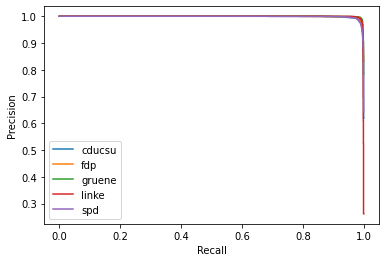

In [21]:
plot_pr(train_data, train_labels, clf)


## Evaluation on Test Data: Overfitting!

In [22]:
test_predictions = clf.predict(test_data)
print(classification_report(test_predictions, test_labels))

              precision    recall  f1-score   support

      cducsu       0.77      0.54      0.64      2137
         fdp       0.27      0.54      0.36       339
      gruene       0.30      0.45      0.36       424
       linke       0.49      0.60      0.54       538
         spd       0.53      0.52      0.52      1291

    accuracy                           0.53      4729
   macro avg       0.47      0.53      0.48      4729
weighted avg       0.59      0.53      0.55      4729



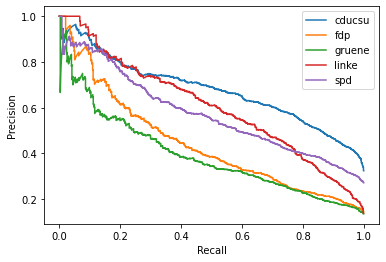

In [23]:
plot_pr(test_data, test_labels, clf)

## Confusion Matrix

Useful to understand what the model gets wrong. 

Shows the occurrences of predicted labels (rows) vs true-labels (columns)

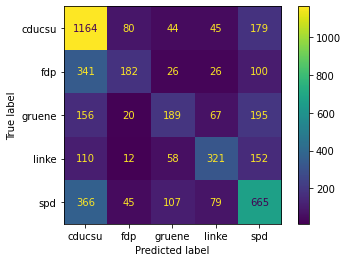

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_labels, test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot();


## What Has the Model Learned?

You can check the covariance of the data $X\in R^{D\times N}$ with the model's predictions $\hat{Y}\in R^{C\times N}$

$X\hat{Y}^\top$

where $D$ is the data dimensionality (here: number of words), $N$ is the number of data points , $C$ is the number of classes (here: parties) and $X$ and $\hat{Y}$ are normalized along the data axis.

[Haufe et al., *On the interpretation of weight vectors of linear models in multivariate neuroimaging.*, Neuroimage, 2014](https://www.ncbi.nlm.nih.gov/pubmed/24239590)

In [25]:
from sklearn.preprocessing import StandardScaler

def list_top_words_per_party(data, clf, top_words=5):
    idx_to_word = {idx:word for word, idx in clf.steps[0][1].vocabulary_.items()}
    ngram_features = StandardScaler().fit_transform(clf.steps[0][1].transform(data).toarray())
    scores = StandardScaler().fit_transform(clf.predict_proba(data))
    parties = clf.steps[1][1].classes_
    top_words_per_party = dict()
    for idx, party in enumerate(parties):
        covar = ngram_features.T @ scores[:,idx]
        top_word_idx = covar.argsort()[-top_words:]
        top_words_per_party[party] = [idx_to_word[idx] for idx in top_word_idx]
    return top_words_per_party
        
list_top_words_per_party(test_data[:1000], clf)

{'cducsu': ['diskussion', 'glaube', 'richtig', 'zukunft', 'christlich'],
 'fdp': ['freizügigkeit', 'christlich', 'liberalen', 'fdp', 'liberale'],
 'gruene': ['biologischen',
  'ökologisch',
  'steigende',
  'vertreterinnen',
  'bundesregierung'],
 'linke': ['skandal', 'sozialversicherungen', 'ausgrenzung', 'hartz', 'armut'],
 'spd': ['niebel', 'gemeint', 'finde', 'kanzlerin', 'fehlanzeige']}

## Cross-Validation (just for evaluation)

- ML models can memorize any data set (**overfitting**)
    
- But we want our models to perform well on new data (**generalization of learned rules**)

- Cross-validation emulates the setting of new unseen data:

    - Split data in training and test
    - Train model on training set
    - Test model on test set
    
- K-Fold Cross-validation:

    - Split data in k non-overlapping folds
    - K Times:
        - Train on k-1 folds
        - Test on 1 remaining fold
        

### Most important ML lesson:

**Never evaluate your ML model on the data used for training*!**


*(and model selection Hyperparameter Optimization counts as training, so you need another data set for that, which is called validation set)

# Model Evaluation

![model_complexity](figures/overfitting_underfitting_cartoon.png)

## Controlling Model Complexity

- Penalization of model complexity in Machine Learning is called **Regularization**
- Regularization can be achieved by:
 - Adapting the objective function of a ML model
 - Changing preprocessing parameters

In [26]:
num_word_params = [10, 100, 1000, 1e4, 1e5, 1e6]
acc_scores_train = []
acc_scores_test = []
for idx, n_words in enumerate(num_word_params):
    clf_tmp = train(train_data, train_labels, num_words=n_words)
    acc_scores_test.append(accuracy_score(test_labels, clf_tmp.predict(test_data)))
    acc_scores_train.append(accuracy_score(train_labels, clf_tmp.predict(train_data)))

Text(0, 0.5, 'Accuracy')

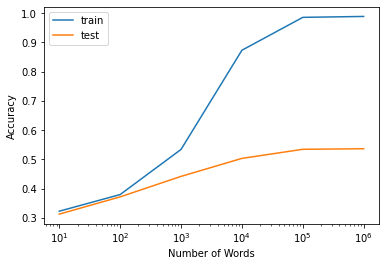

In [27]:
plt.plot(num_word_params, acc_scores_train)
plt.plot(num_word_params, acc_scores_test)
plt.xscale('log')
plt.legend(['train','test'])
plt.xlabel('Number of Words')
plt.ylabel('Accuracy')

# Model Evaluation

![model_complexity](figures/overfitting_underfitting_cartoon.png)

# Hyperparameters

- For an end-to-end (raw data to final prediction) ML system, many hyperparameters need to be set


- Selecting the right hyperparameters is often crucial for successful predictions


- A hyperparameter (HP) is often defined as a parameter that cannot be estimated using gradient descent. 


- Examples:
    - number of words in a bag-of-words representation
    - number of categories (assuming that there are many rare ones)
    - $n$ in n-grams
    - normalization or not
    - learning rate in stochastic gradient descent
    - ...
    

    

## Hyperparameter Optimization

 
Hyperparameter optimization (HPO) requires yet another data split:
    
 - Either just train (for training) / validation  (for HPO) / test (for evaluation)
 - Or k-fold nested Cross-validation
     - Split data into k folds
     - K times:
         - Keep one fold aside for evaluation (**outer** cross-validation)
         - Run HPO with cross-validation on remaining k-1 folds using (**inner** cross-validation)
         
 - Nested Cross-validation is more expensive but gives you better hyperparameters as well as better generalization error estimates


## Hyperparameter Optimization

- Grid Search: Try all possible hyperparameter sets using nested cross validation


- Random Search: Try a number of random hyperparameter sets (works surprisingly well)


- Bayesian Global Optimization: Train a probabilistic model (e.g. Gaussian Processes) to predict model performance given hyperparameter settings

In [28]:

def train_hpo(texts, party, num_words=1e5):
    '''
    A function that takes trains a simple NLP text classification pipeline

    Input: 
        texts and labels and number of features

    Output: 
        trained pipeline
    
    '''
    
    text_clf = Pipeline([('vect', TfidfVectorizer(max_features=int(num_words))),
                            ('clf', SGDClassifier(loss='log'))])

    # some hyperparameters
    parameters = {
        'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'clf__alpha': (np.logspace(-5, 2, 5)).tolist()
    }
    # perform gridsearch to get the best regularizer
    clf = GridSearchCV(text_clf, parameters, cv=2, n_jobs=-1,verbose=0)
    clf.fit(texts, party)

    return clf

In [29]:
clf = train_hpo(train_data, train_labels)
print(classification_report(test_labels, clf.predict(test_data)))

              precision    recall  f1-score   support

      cducsu       0.63      0.82      0.71      1512
         fdp       0.59      0.33      0.42       675
      gruene       0.55      0.36      0.43       627
       linke       0.65      0.62      0.64       653
         spd       0.61      0.65      0.63      1262

    accuracy                           0.62      4729
   macro avg       0.61      0.56      0.57      4729
weighted avg       0.61      0.62      0.60      4729



# Recap: Cross-Validation

- Split dataset in training and test set
- Used for:
    - Model Evaluation
        - Requires **at least two** different folds / partitions / data sets (train and test)
    - Hyperparameter Optimization
        - Requires **at least three** different folds (train, validation and test)
- Fast Cross-validation:
    - Make two (or three) partitions, train (or validate and train) and test
- Cross-validation with best generalization performance estimates:
    - k-fold

## Simplest Cross-Validation for Model Evaluation

Split data into **two folds** and train / test **just once**

|$~$ |$~$|
|--|--|
|Fold 1|Test|
|Fold 2|Train|

## Example 3-Fold Cross-Validation for Model Evaluation:

Split data into three folds:

|$~$ |
|--|
|Fold 1|
|Fold 2|
|Fold 3|

### Iteration 1

|$~$ |$~$|
|--|--|
|Fold 1|Test|
|Fold 2|Train|
|Fold 3|Train|

###  Iteration 2

|$~$ |$~$|
|--|--|
|Fold 1|Train|
|Fold 2|Test|
|Fold 3|Train|

###  Iteration 3

|$~$ |$~$|
|--|--|
|Fold 1|Train|
|Fold 2|Train|
|Fold 3|Test|

## Simplest Cross-Validation for Model Evaluation and Model Selection

Split data into **three folds** and perform model selection on the train set using the validation set for computing the generalization performance. After best hyperparameters are found, train on the training (and the validation) set and test the model on the test set. 

|$~$ |$~$|
|--|--|
|Fold 1|Test|
|Fold 2|Validation|
|Fold 3|Train|

## Example 3-Fold Nested Cross-Validation:

This performs an 

- **inner** cross-validation for **model selection** / hyperparameter optimization 

nested in an 

- **outer** cross-validation loop for **model evaluation**

Split data into three folds:

|$~$ |
|--|
|Fold 1|
|Fold 2|
|Fold 3|

### Outer (Evaluation)  Iteration 1

Perform model selection on the train set using the validation set for computing the generalization performance.

#### Inner (Model Selection)  Iteration 1

|$~$|$~$|
|--|--|
|Fold 1|Test|
|Fold 2|Validation|
|Fold 3|Train|

#### Inner (Model Selection)  Iteration 2

|$~$|$~$|
|--|--|
|Fold 1|Test|
|Fold 2|Train|
|Fold 3|Validation|

### Outer (Evaluation)  Iteration 2

Perform model selection on the train set using the validation set for computing the generalization performance.

#### Inner (Model Selection)  Iteration 1

|$~$|$~$|
|--|--|
|Fold 1|Validation|
|Fold 2|Test|
|Fold 3|Train|

#### Inner (Model Selection) Iteration 2

|$~$|$~$|
|--|--|
|Fold 1|Train|
|Fold 2|Test|
|Fold 3|Validation|

### Iteration 3

Perform model selection on the train set using the validation set for computing the generalization performance.

#### Inner (Model Selection) Iteration 1

|$~$|$~$|
|--|--|
|Fold 1|Train|
|Fold 2|Validation|
|Fold 3|Test|

#### Inner (Model Selection) Iteration 2

|$~$|$~$|
|--|--|
|Fold 1|Validation|
|Fold 2|Train|
|Fold 3|Test|

In [30]:
def train_and_test(train_folds, test_fold, hpo_candidate):
    """
    This function emulates a model training and testing 
    with a fixed hyperparameter set candidate
    Instead of really training a model and testing it, 
    this function returns a random number
    """
    print(f"Training with hyperparameter {hpo_candidate} on " +  
                  f"folds {training_folds}, testing on {test_fold}")
    return np.random.randint(0,10)

In [31]:
import numpy as np
folds = [0,1,2]

hyperparameters = [1e-5, 1]

evaluation_scores = np.zeros(len(folds))
for outer_idx, evaluation_fold in enumerate(folds):
    training_folds = [f for f in folds if f != evaluation_fold]
    hpo_results = np.zeros((len(folds), len(hyperparameters)))
    print("*"*80)
    print(f"Hyperparameter Optimization on fold {training_folds}")
    print("*"*80)
    for inner_idx, hpo_evaluation_fold in enumerate(training_folds):
        hpo_training_folds = [f for f in training_folds if f != hpo_evaluation_fold]
        for hpo_idx, hpo_candidate in enumerate(hyperparameters):
            hpo_results[inner_idx, hpo_idx] = train_and_test(hpo_training_folds, hpo_evaluation_fold, hpo_candidate)
    best_hyperparameter = hyperparameters[hpo_results.mean(axis=0).argmax()]
    print("*"*80)
    print(f"Best Hyperparameter: {best_hyperparameter}")
    train_and_test(training_folds, 
                   evaluation_fold, 
                   best_hyperparameter)
    print("\n")


********************************************************************************
Hyperparameter Optimization on fold [1, 2]
********************************************************************************
Training with hyperparameter 1e-05 on folds [1, 2], testing on 1
Training with hyperparameter 1 on folds [1, 2], testing on 1
Training with hyperparameter 1e-05 on folds [1, 2], testing on 2
Training with hyperparameter 1 on folds [1, 2], testing on 2
********************************************************************************
Best Hyperparameter: 1
Training with hyperparameter 1 on folds [1, 2], testing on 0


********************************************************************************
Hyperparameter Optimization on fold [0, 2]
********************************************************************************
Training with hyperparameter 1e-05 on folds [0, 2], testing on 0
Training with hyperparameter 1 on folds [0, 2], testing on 0
Training with hyperparameter 1e-05 on folds [

## Testing Model with User Input

In [32]:
text = "Neoliberale Heuschrecken Banker sind schlecht für den Sozialstaat."
clf.predict([text])

array(['linke'], dtype='<U6')

In [33]:
text = "Wachstum und Sicherheit sind wichtig für glückliche Familien"
clf.predict([text])

array(['cducsu'], dtype='<U6')

## Classification of Newspaper Articles

In [38]:
import newspaper

news_with_predictions = []
articles = newspaper.build("https://www.sueddeutsche.de/").articles

In [ ]:
for article in articles:
    article.download()
    article.parse()
    news_with_predictions.append(
        {
            'title': article.title,
            'url': article.url,
            'text': article.text,
            'party_prediction': clf.predict([article.text]) 
        })

In [43]:
df_news = pd.DataFrame(news_with_predictions)
df_news

,title,url,text,party_prediction
0,Corona-Soforthilfen: Nun kommt die große Rechnung,https://www.sueddeutsche.de/wirtschaft/corona-...,Schnell und unbürokratisch wurden Corona-Sofor...,[linke]
1,Corona aktuell: Viele Corona-Tote in Polen,https://www.sueddeutsche.de/politik/corona-akt...,In Polen ist die höchste Zahl an Corona-Toten ...,[linke]
2,Omikron in New York: 22 000 Neuinfizierte am T...,https://www.sueddeutsche.de/politik/corona-usa...,Die Zahl der positiven Tests hat sich in der v...,[linke]
3,Wie man Neujahrsvorsätze in die Tat umsetzt,https://sz-magazin.sueddeutsche.de/gesundheit/...,"SZ-Magazin: Herr Gollwitzer, können Sie mir er...",[linke]
4,Der rechte Wahlkampf in Frankreich gleicht imm...,https://www.sueddeutsche.de/kultur/emily-in-pa...,"Von Nadia Pantel\n\nWenn es in Paris regnet, d...",[linke]
...,...,...,...,...
296,Der rechte Wahlkampf in Frankreich gleicht imm...,https://www.sueddeutsche.de/kultur/emily-in-pa...,"Von Nadia Pantel\n\nWenn es in Paris regnet, d...",[linke]
297,Wie die Finanzindustrie junge Menschen ködert,https://www.sueddeutsche.de/wirtschaft/banken-...,Von Harald Freiberger und Claus Hulverscheidt\...,[spd]
298,Denkmalschutz in München: Prachtvolles Haus in...,https://www.sueddeutsche.de/muenchen/denkmalsc...,"Von Lea Kramer\n\nSobald der Wind weht, ist vo...",[linke]
299,Friedrich Merz: Der künftige CDU-Chef trifft d...,https://www.sueddeutsche.de/meinung/friedrich-...,Kommentar von Detlef Esslinger\n\nFriedrich Me...,[gruene]


Zeitungsartikel: Corona aktuell: Viele Corona-Tote in Polen


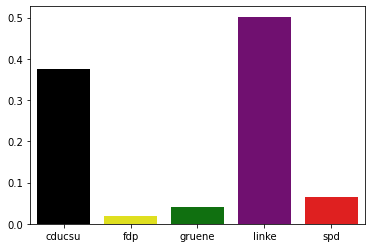

In [44]:
prediction = clf.predict_proba([df_news.loc[1,'text']])  


print("Zeitungsartikel: {}".format(df_news.loc[1,'title']))

import seaborn as sns
%matplotlib inline
sns.barplot(clf.best_estimator_.steps[1][1].classes_, prediction.flatten(), palette=[partei_farben[p] for p in clf.classes_]);

# How Bad is the ML Model vs Human Performance

In [ ]:
# We draw 5 random speeches with less than 2000 characters, so it's still readable
samples = df[df.text.apply(len) < 1002].sample(5)
prediction_human = []
prediction_machine = clf.predict(samples.text)
true_party = samples.partei.tolist()

for idx, text in enumerate(samples.text):
    print("================================")
    print(text)
    print('------------------------------------')
    print("Which party does this speech belong to? Choose from {}".format(clf.classes_))
    prediction_human.append(input())
    print("*****************************")
    print("Your prediction: {}".format(prediction_human[-1]))
    print("ML prediction: {}".format(prediction_machine[idx]))
    print("True party: {}".format(true_party[idx]))
    print("================================")

In [ ]:
print("Your performance:")
print(classification_report(prediction_human, true_party))

print("ML model performance:")
print(classification_report(prediction_machine, true_party))